# Introduction to hypothesis testing figures generation

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from ministats import nicebins
from ministats.utils import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/intro_to_NHST"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

## Definitions


### Test statistic


In [5]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

## The logic of hypothesis testing

## Simulation tests

In [6]:
def gen_sampling_dist(rv, estfunc, n, N=10000):
    """
    Simulate `N` samples of size `n` from the random variable `rv` to
    generate the sampling distribution of the estimator `estfunc`.
    """
    estimates = []
    for i in range(0, N):
        sample = rv.rvs(n)
        estimate = estfunc(sample)
        estimates.append(estimate)
    return estimates

## Test for the mean


#### Computer model for the kombucha volumes under $H_0$

In [7]:
from scipy.stats import norm

# theoretical model for the kombucha volumes
muK0 = 1000   # theoretical mean
sigmaK0 = 10  # theoretical standard deviation

rvK0 = norm(muK0, sigmaK0)

### Sampling distribution of the mean under the null

In [8]:
from stats_helpers import gen_sampling_dist

np.random.seed(42)
kbars40 = gen_sampling_dist(rvK0, estfunc=mean, n=40)

Saved figure to figures/stats/intro_to_NHST/hist_kbars40.pdf
Saved figure to figures/stats/intro_to_NHST/hist_kbars40.png


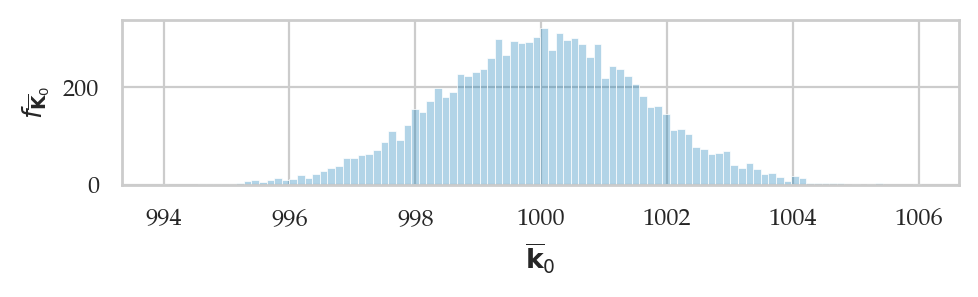

In [9]:
# figures only
filename = os.path.join(DESTDIR, "hist_kbars40.pdf")
ax = sns.histplot(kbars40, bins=100, alpha=0.3)
ax.set_xlabel("$\overline{\mathbf{k}}_0$")
ax.set_ylabel("$f_{\overline{\mathbf{K}}_0}$")
savefigure(ax, filename)

### Example 1S: test for the mean of Batch 04

In [10]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch04 = kombucha[kombucha["batch"]==4]
ksample04 = batch04["volume"]

In [11]:
len(ksample04)

40

In [12]:
# observed mean
obsmean04 = mean(ksample04)
obsmean04

1003.8335

#### Sampling distribution of the mean under the null hypothesis

In [13]:
from stats_helpers import gen_sampling_dist

np.random.seed(42)
kbars40 = gen_sampling_dist(rvK0, estfunc=mean, n=40)

In [14]:
obsdev04 = abs(obsmean04 - muK0)
obsdev04

3.833499999999958

In [15]:
tails = [v for v in kbars40 if abs(v-muK0) >= obsdev04]

Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsmean04.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsmean04.png


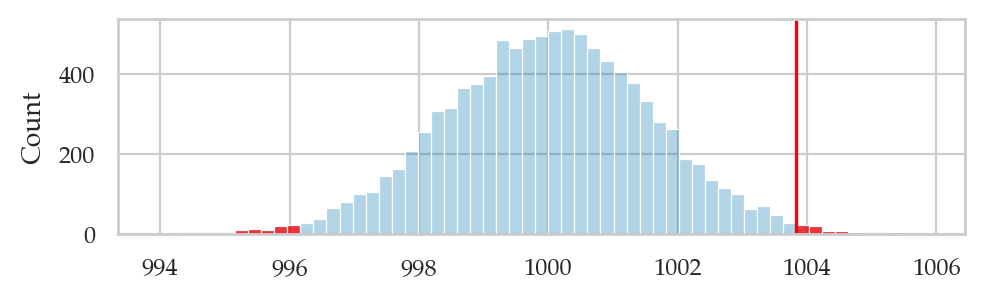

In [16]:
filename = os.path.join(DESTDIR, "hist_p-value_kombucha_obsmean04.pdf")

# plot the sampling distribution as a histogram
bins = nicebins(kbars40, obsmean04)
ax = sns.histplot(kbars40, bins=bins, alpha=0.3)

# plot red line for the observed statistic
plt.axvline(obsmean04, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(tails, bins=bins, ax=ax, color="red")
# ax.set_ylabel("$f_{\overline{\mathbf{K}}_0}$")

savefigure(ax, filename)

### Example 2S: test for the mean of Batch 01

In [17]:
batch01 = kombucha[kombucha["batch"]==1]
ksample01 = batch01["volume"]
len(ksample01)

40

In [18]:
obsmean01 = mean(ksample01)
obsmean01

999.10375

In [19]:
np.random.seed(42)
kbars40 = gen_sampling_dist(rvK0, estfunc=mean, n=40)

In [20]:
obsdev01 = abs(obsmean01 - muK0)
tails = [v for v in kbars40 if abs(v-muK0) >= obsdev01]
pvalue01 = len(tails) / len(kbars40)
pvalue01

0.5711

Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsmean01.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsmean01.png


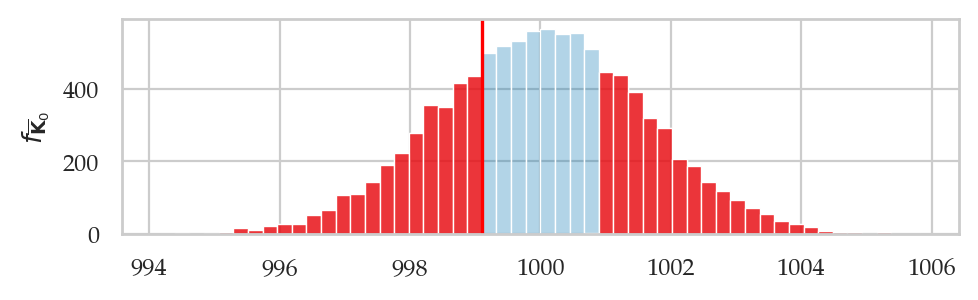

In [21]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "hist_p-value_kombucha_obsmean01.pdf")

# plot the sampling distribution as a histogram
bins = nicebins(kbars40, obsmean01)
ax = sns.histplot(kbars40, bins=bins, alpha=0.3)

# plot red line for the observed statistic
plt.axvline(obsmean01, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(tails, bins=bins, ax=ax, color="red")
ax.set_ylabel("$f_{\overline{\mathbf{K}}_0}$")

savefigure(ax, filename)

## Test for the variance

#### Sampling distribution of the variance under the null


In [22]:
from stats_helpers import gen_sampling_dist

np.random.seed(42)
kvars20 = gen_sampling_dist(rvK0, estfunc=var, n=20)

Saved figure to figures/stats/intro_to_NHST/hist_kvars20.pdf
Saved figure to figures/stats/intro_to_NHST/hist_kvars20.png


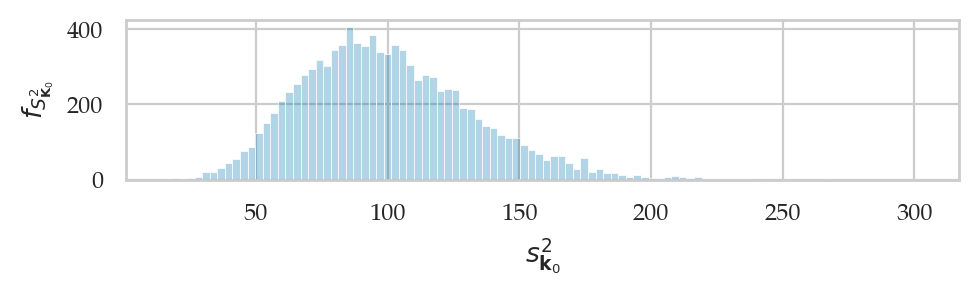

In [23]:
filename = os.path.join(DESTDIR, "hist_kvars20.pdf")
ax = sns.histplot(kvars20, bins=100, alpha=0.3)
ax.set_xlabel("$s_{{\mathbf{k}}_0}^2$")
ax.set_ylabel("$f_{S_{{\mathbf{K}}_0}^2}$")
savefigure(ax, filename)

### Example 3S: test for the variance of Batch 02

In [24]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]
len(ksample02)

20

In [25]:
obsvar02 = var(ksample02)
obsvar02

124.31760105263136

In [26]:
np.random.seed(42)
kvars20 = gen_sampling_dist(rvK0, estfunc=var, n=20)

In [27]:
right_tail = [v for v in kvars20 if v >= obsvar02]
pvalue02 = len(right_tail) / len(kvars20)
pvalue02

0.2132

Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsvar02.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsvar02.png


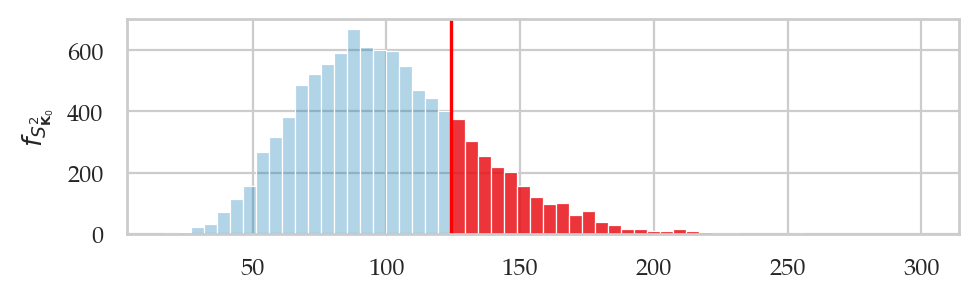

In [28]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "hist_p-value_kombucha_obsvar02.pdf")

# plot the sampling distribution as a histogram
bins = nicebins(kvars20, obsvar02)
ax = sns.histplot(kvars20, bins=bins, alpha=0.3)

# plot red line for the observed statistic
plt.axvline(obsvar02, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(right_tail, bins=bins, ax=ax, color="red")
ax.set_ylabel("$f_{S^2_{\mathbf{K}_0}}$")

savefigure(ax, filename)

### Example 4S: test for the variance of Batch 08

In [29]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch08 = kombucha[kombucha["batch"]==8]
ksample08 = batch08["volume"]
len(ksample08)

40

In [30]:
obsvar08 = var(ksample08)
obsvar08

169.9979220512824

In [31]:
np.random.seed(43)
kvars40 = gen_sampling_dist(rvK0, estfunc=var, n=40)

In [32]:
right_tail = [v for v in kvars40 if v >= obsvar08]
pvalue08 = len(right_tail) / len(kvars40)
pvalue08

0.0041

Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsvar08.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-value_kombucha_obsvar08.png


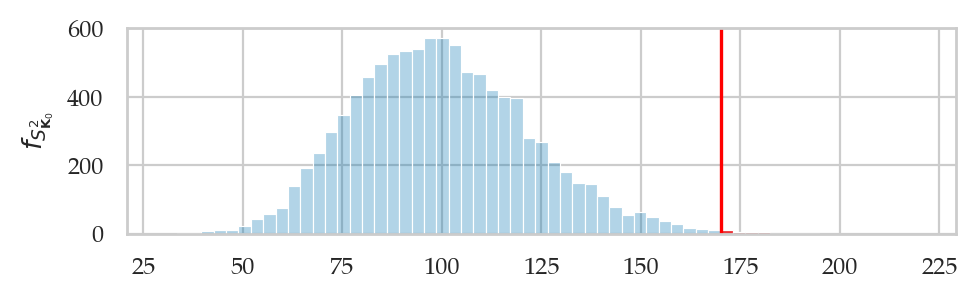

In [33]:
filename = os.path.join(DESTDIR, "hist_p-value_kombucha_obsvar08.pdf")

# plot the sampling distribution as a histogram
bins = nicebins(kvars40, obsvar08)
ax = sns.histplot(kvars40, bins=bins, alpha=0.3)

# plot red line for the observed statistic
plt.axvline(obsvar08, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(right_tail, bins=bins, ax=ax, color="red")
ax.set_ylabel("$f_{S^2_{\mathbf{K}_0}}$")

savefigure(ax, filename)

## Explanations

### One-sided and two-sided tests

In [34]:
# FIGURES ONLY
from stats_helpers import tailvalues
from scipy.stats import t as tdist
rvT = tdist(df=9)
xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)
N = 100000
np.random.seed(42)
ts = rvT.rvs(N)
bins = nicebins(xs, 2, nbins=50)

FIGSIZE = (6,1.4)

Saved figure to figures/stats/intro_to_NHST/hist_p-values_right_tail_test.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-values_right_tail_test.png


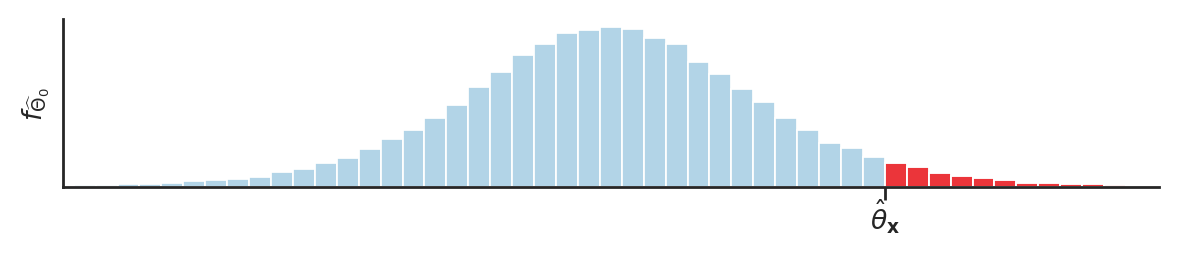

In [35]:
# FIGURES ONLY -- RIGHT
filename = os.path.join(DESTDIR, "hist_p-values_right_tail_test.pdf")
with plt.rc_context({"figure.figsize":FIGSIZE}), sns.axes_style("ticks"):
    fig, ax3 = plt.subplots()
    ax3.set_ylabel("$f_{\widehat{\Theta}_0}$")

    sns.histplot(ts, ax=ax3, bins=bins, alpha=0.3)
    ax3.set_xlim(-4, 4)
    ax3.set_xticks([2])
    ax3.set_xticklabels([])
    ax3.set_yticks([])
    ax3.spines[['right', 'top']].set_visible(False)
    # highlight the right tail
    tailvalues3 = [t for t in ts if t >= 2]
    sns.histplot(tailvalues3, bins=bins, ax=ax3, color="red")
    ax3.text(2, -370, "$\hat{\\theta}_{\mathbf{x}}$", verticalalignment="top", horizontalalignment="center")

savefigure(fig, filename)

Saved figure to figures/stats/intro_to_NHST/hist_p-values_left_tail_test.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-values_left_tail_test.png


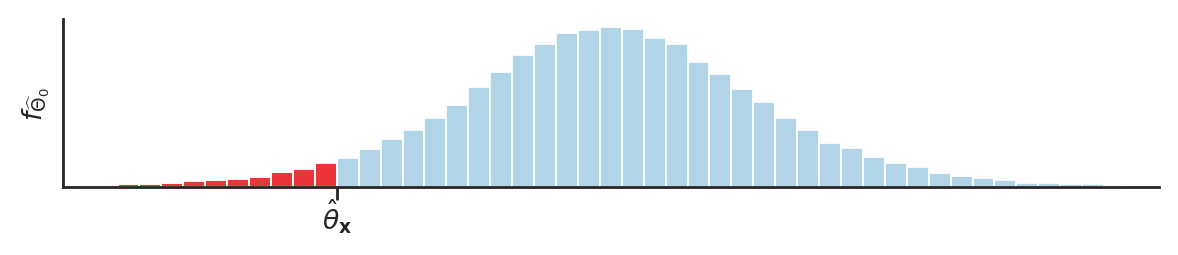

In [36]:
# FIGURES ONLY -- LEFT
filename = os.path.join(DESTDIR, "hist_p-values_left_tail_test.pdf")
with plt.rc_context({"figure.figsize":FIGSIZE}), sns.axes_style("ticks"):
    fig, ax1 = plt.subplots()
    ax1.set_ylabel("$f_{\widehat{\Theta}_0}$")

    sns.histplot(ts, ax=ax1, bins=bins, alpha=0.3)
    ax1.set_xlim(-4, 4)
    ax1.set_xticks([-2])
    ax1.set_xticklabels([])
    ax1.set_yticks([])
    ax1.spines[['right', 'top']].set_visible(False)
    # highlight the left tail
    tailvalues1 = tailvalues(ts, -2, alt="less")
    sns.histplot(tailvalues1, bins=bins, ax=ax1, color="red")
    ax1.text(-2, -370, r"$\hat{\theta}_{\mathbf{x}}$", va="top", ha="center")

savefigure(fig, filename)

Saved figure to figures/stats/intro_to_NHST/hist_p-values_two_tail_test.pdf
Saved figure to figures/stats/intro_to_NHST/hist_p-values_two_tail_test.png


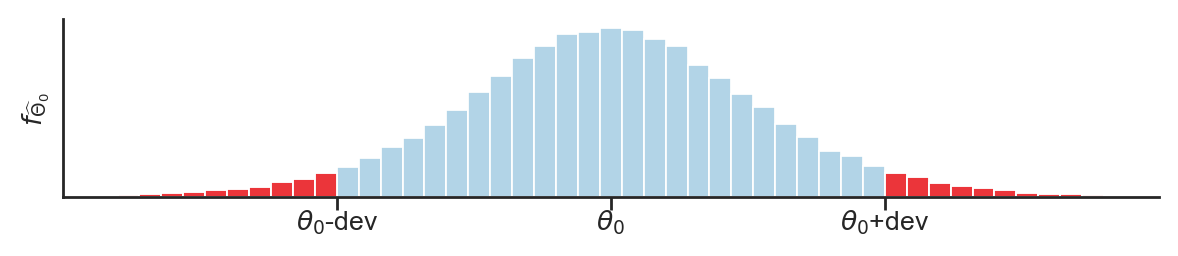

In [37]:
# FIGURES ONLY -- TWO-TAILED
filename = os.path.join(DESTDIR, "hist_p-values_two_tail_test.pdf")
with plt.rc_context({"figure.figsize":FIGSIZE}), sns.axes_style("ticks"):
    fig, ax2 = plt.subplots()
    ax2.set_ylabel("$f_{\widehat{\Theta}_0}$")

    sns.histplot(ts, ax=ax2, bins=bins, alpha=0.3)
    ax2.set_xlim(-4, 4)
    ax2.set_xticks([-2,0,2])
    ax2.set_xticklabels([])
    ax2.set_yticks([])
    ax2.spines[['right', 'top']].set_visible(False)
    # highlight the left and right tails
    tailvalues2 = [t for t in ts if t <= -2 or t >= 2]
    sns.histplot(tailvalues2, bins=bins, ax=ax2, color="red")
    ax2.text(-2, -370, r"$\theta_0$-dev", va="top", ha="center")
    ax2.text(2, -370, r"$\theta_0$+dev", va="top", ha="center")
    ax2.text(0, -370, r"$\theta_0$", va="top", ha="center")

savefigure(fig, filename)

#### Selecting the tails of a distribution


#### One-sided $p$-value calculation example

#### Two-sided $p$-value calculation example

## Discussion

## Exercises

## Links